# Perfíl de Pozo desde archivo LAS

**Created by:** Rubens Merlino

**Based on works of:** Andy McDonald  


## Loading and Checking Data
The first step is to import the required libraries: pandas, matplotlib and LASIO.  
lasio is a library that has been developed to handle and work with LAS files. More info on the library can be found at: https://lasio.readthedocs.io/en/latest/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

%matplotlib inline 
#%matplotlib qt 

To load our file in, we can use the read() method from LASIO like so:

In [23]:
lasRes = lasio.read("FCIEN/NO_10_I_X1 - ITACUMBU/NO_10_I_X1 - Induction.las")
lasCali = lasio.read("FCIEN/NO_10_I_X1 - ITACUMBU/NO_10_I_X1 - DT.las")
lasSPGR = lasio.read("FCIEN/NO_10_I_X1 - ITACUMBU/NO_10_I_X1 - Induction-SFL.las")

In [35]:
wellRes = lasRes.df()
wellCali = lasCali.df()
wellSPGR = lasSPGR.df()
wellRes.describe()

,ILD,SFLU,ILM
count,31622.000000,31611.000000,31545.000000
mean,426.261010,256.665809,253.685840
std,750.578095,492.154196,535.481182
min,0.197200,0.207700,0.200000
25%,9.126450,14.706600,10.962200
50%,23.240700,20.377800,19.865400
75%,252.870575,142.310400,76.379900
max,2057.926000,1893.718300,2013.366300


Una vez cargado el archivo podemos comenzar a ver los datos que contiene para procesarlo.

In [29]:
# Parámetros generales
for item in lasRes.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

START DEPTH (STRT): 519.6
STOP DEPTH (STOP): 2101.1
STEP LENGTH (STEP): 0.05
NO VALUE (NULL): -999.25
COMPANY (COMP): ANCAP
WELL (WELL): NO10 I. X-1
FIELD (FLD): ITACUMBU
LOCATION (LOC): 
PROVINCE (PROV): ARTIGAS
STATE (STAT): URUGUAY
EASTING (EAST): 338824.04
NORTHING (NORTH): 6620339.63
PROJECTION NAME (PROJN): YACARE (URUGUAY)
PROJECTION (PROJT): TRANSVERSE MERCATOR
ELIPSOID (ELIP): INTERNATIONAL 1924
CENTRAL MERIDIAN (CMER): 55° 48' 0.0" W
LATITUDE OF ORIGIN (LATOR): 0° 0' 0.0" N
FALSE NORTHING (FNORT): 10002288
FALSE EASTING (FEAST): 500000
SCALE FACTOR (SFACT): 1
SERVICE COMPANY (SRVC): SCHLUMBERGER
LOGDATE (DATE): 14 JUN 87


Extraemos valores generales para variables:

In [28]:
tituloPozo = 'Pozo: ' + lasRes.well.WELL.value + ' - ' + lasRes.well.FLD.value
nombrePozo = 'Pozo ' + lasRes.well.WELL.value + ' - ' + lasRes.well.FLD.value
nombrePozo

'Pozo NO10 I. X-1 - ITACUMBU'

Observamos las curvas que presenta el fichero, sus unidades y descripción

In [21]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, Units: M, Description: 
Curve: ILD, Units: ohmm, Description: Induction Laterolog, Deep
Curve: SFLU, Units: ohmm, Description: Spherically focused log unaveraged
Curve: ILM, Units: ohmm, Description: Induction Laterolog, Medium
There are a total of: 4 curves present within this file


## Creamos un Pandas DataFrame desde del LAS
Data loaded in using LASIO can be converted to a pandas dataframe using the .df() function. This allows us to easily plot data and pass it into one of the many machine learning algorithms.

In [22]:
well = las.df()
well.head()

,ILD,SFLU,ILM
DEPT,,,
519.60,NaN,0.4728,NaN
519.65,NaN,0.7481,NaN
519.70,NaN,1.0235,NaN
519.75,NaN,1.2990,NaN
519.80,NaN,3.6026,1821.1898


En este caso la profundidad en metros está dada por la columna 'DEPT:2', la pasamos a índice

In [30]:
wellRes.describe()

,ILD,SFLU,ILM
count,31622.000000,31611.000000,31545.000000
mean,426.261010,256.665809,253.685840
std,750.578095,492.154196,535.481182
min,0.197200,0.207700,0.200000
25%,9.126450,14.706600,10.962200
50%,23.240700,20.377800,19.865400
75%,252.870575,142.310400,76.379900
max,2057.926000,1893.718300,2013.366300


To find out more information about data, we can call upon the `.info()` and `.describe()` functions.  
    
The `.info()` function provides information about the data types and how many non-null values are present within each curve.  
The `.describe()` function, provides statistical information about each curve and can be a useful QC for each curve.

## Comenzamos a visualizar los datos

Procedemos a quitar valores outliers para mejorar la observación de datos

In [13]:
#Quitamos valores 0 que estropean el ploteo

well = well.drop(well[well['CALI']<0].index)
well = well.drop(well[well['GR']==0].index)
well = well.drop(well[well['SP']==0].index)
well = well.drop(well[well['ILD']==0].index)
well = well.drop(well[well['ILD']<0].index)
well = well.drop(well[well['ILM']==0].index)


In [38]:
# Creamos el well_nan para visualizar los rangos de datos contenidos en el LAS
well_nan = wellSPGR.notnull() * 1

We can now create a summary plot of the missing data

IndexError: single positional indexer is out-of-bounds

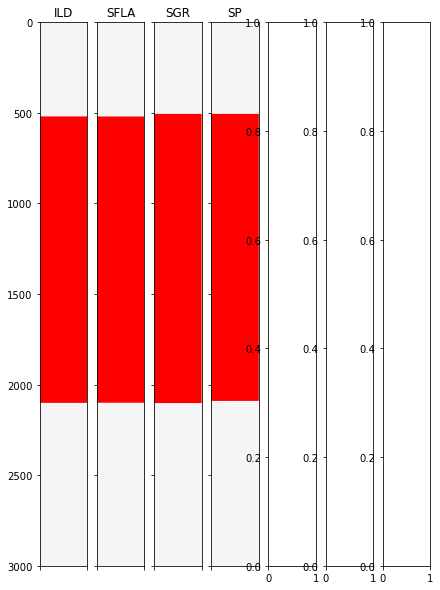

In [39]:
fig = plt.subplots(figsize=(7,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(3000, 0)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

## Plotting Log Data
Finally, we can plot our data using the code below. Essentially, the code is building up a series of subplots and plotting the data on the relevant tracks.  
  
When we add curves to the tracks, we need to set the curve's properties, including the limits, colour and labels. We can also specify the shading between curves. An example has been added to the caliper curve to show shading between a bitsize value (8.5") and the CALI curve.  
  
If there are a number of features that are common between the plots, we can iterate over them using a for loop.

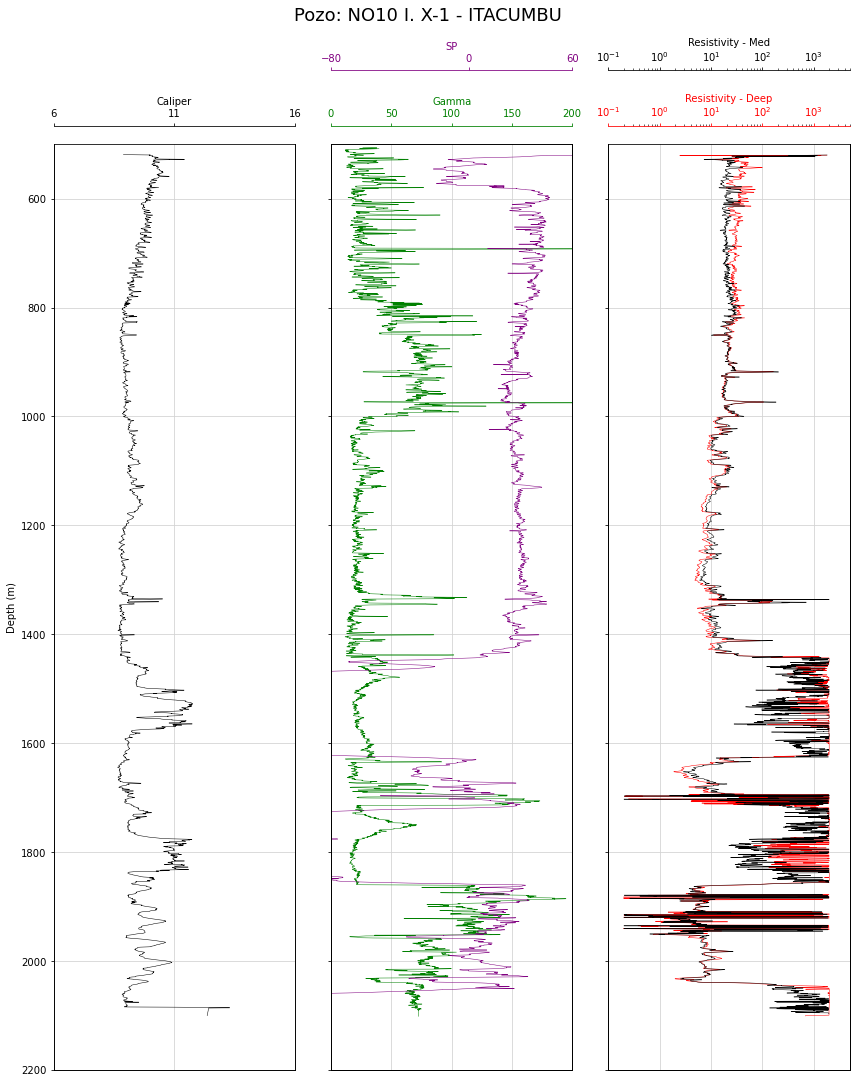

In [47]:
fig, ax = plt.subplots(figsize=(12,15))

# Create a dictionary of formations with a top and bottom depth
formations = {"A":[470, 900], 
              "B": [900, 1370],
              "C": [1370, 1553],
              "D": [1553, 1668],
              "E": [1668, 1778]}

# Select the same number of colours as there are formations
zone_colours = ["red", "blue", "green", "orange", "purple"]




#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1, sharey = ax1)
#ax6 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax4.twiny()
ax6 = ax2.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)


# Caliper track
ax1.plot(wellCali["CALI"], wellCali.index, color = "black", linewidth = 0.5)
ax1.set_xlabel("Caliper")
ax1.set_xlim(6, 16)
ax1.set_ylabel("Depth (m)")
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
#ax1.fill_betweenx(well_nan.index, 8.0, well["CALI"], facecolor='yellow')
ax1.set_xticks([6,  11, 16])


# Gamma Ray track
ax2.plot(wellSPGR["SGR"], wellSPGR.index, color = "green", linewidth = 0.5)
ax2.set_xlabel("Gamma")
ax2.xaxis.label.set_color("green")
ax2.set_xlim(0, 200)
ax2.tick_params(axis='x', colors="green")
ax2.spines["top"].set_edgecolor("green")
ax2.title.set_color('green')
ax2.set_xticks([0, 50, 100, 150, 200])
#ax1.fill_betweenx(well_nan.index, well["GR"], 200, facecolor='yellow')

# Resistivity track
ax4.plot(wellRes["ILD"], wellRes.index, color = "red", linewidth = 0.5)
ax4.set_xlabel("Resistivity - Deep")
ax4.set_xlim(0.1, 5000)
ax4.xaxis.label.set_color("red")
ax4.tick_params(axis='x', colors="red")
ax4.spines["top"].set_edgecolor("red")
ax4.set_xticks([0.1, 1, 10, 100, 1000])
ax4.semilogx()

# Resistivity track - Curve 2
ax7.plot(wellRes["ILM"], wellRes.index, color = "black", linewidth = 0.5)
ax7.set_xlabel("Resistivity - Med")
ax7.set_xlim(0.1, 5000)
ax7.xaxis.label.set_color("black")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="black")
ax7.spines["top"].set_edgecolor("black")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()


# Spontaneous Potencial
ax6.plot(wellSPGR["SP"], wellSPGR.index, color = "purple", linewidth = 0.5)
ax6.set_xlabel("SP")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.set_xlim(-80, 60)
ax6.xaxis.label.set_color("purple")
ax6.tick_params(axis='x', colors="purple")
ax6.spines["top"].set_edgecolor("purple")
ax6.xaxis.set_ticks_position("top")
ax6.set_xticks([-80, 0, 60])



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax4]:
    ax.set_ylim(2200, 500)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    #for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        #ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    

for ax in [ax2, ax4, ax6]:
    plt.setp(ax.get_yticklabels(), visible = False)


fig.suptitle(tituloPozo, y=1, ha='center', fontsize=18)
plt.tight_layout()

fig.subplots_adjust(wspace = 0.15)
#plt.savefig(nombrePozo + '_large' + ".jpg")
plt.savefig(nombrePozo + ".jpg")
plt.show()

Guardamos dataFrame como XLSX

In [17]:
well.to_excel(nombrePozo + '.xlsx')